# A. Cleaning data:

## A.1 Wide to Long

### A.1.1 Import

In [1]:
import pandas as pd
import os
data_folder = '../../data/examples/module_3'
os.listdir(data_folder)

['health_expenditure_raw.csv',
 'education.csv',
 'gini.csv',
 'democracy_gdp.csv',
 '.ipynb_checkpoints',
 'pisa.csv']

In [2]:
df_gini = pd.read_csv(f"{data_folder}/gini.csv")
df_gini_clean = df_gini.drop(['Unnamed: 0'], axis = 'columns')
df_gini_clean = df_gini_clean.rename(columns = {"Country Name": 'country'})
df_gini_clean.head(2)

,country,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Australia,..,33.5,..,33.5,33.1,..,..,..,35.4,...,..,34.4,..,33.7,..,34.3,..,..,..,..
1,Austria,29,..,..,29.5,29.8,28.7,29.6,30.6,30.4,...,30.8,30.5,30.5,30.8,29.7,30.8,30.2,29.8,30.7,..


In [3]:
df_pisa = pd.read_csv(f"{data_folder}/pisa.csv")
df_pisa_clean = df_pisa.copy().drop(['Unnamed: 0'], axis = 'columns')
df_pisa_clean.head(2)

,country,2000,2003,2006,2009,2012,2015,2018,2022,region,subregion
0,Australia,528.0,525.0,513.0,515.0,512.0,503.0,503.0,498.0,Oceania,Australia and New Zealand
1,Austria,492.0,491.0,490.0,470.0,490.0,485.0,484.0,480.0,Europe,Western Europe


### A.1.2 Drop or set index all non-year columns

In [4]:
df_pisa_clean = df_pisa_clean.set_index(['country', 'subregion', 'region'])
df_pisa_clean.head(2)

,,,2000,2003,2006,2009,2012,2015,2018,2022
country,subregion,region,,,,,,,,
Australia,Australia and New Zealand,Oceania,528.0,525.0,513.0,515.0,512.0,503.0,503.0,498.0
Austria,Western Europe,Europe,492.0,491.0,490.0,470.0,490.0,485.0,484.0,480.0


In [5]:
df_gini_clean = df_gini_clean.set_index('country')
df_gini_clean.head(2)

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
country,,,,,,,,,,,,,,,,,,,,,
Australia,..,33.5,..,33.5,33.1,..,..,..,35.4,..,...,..,34.4,..,33.7,..,34.3,..,..,..,..
Austria,29,..,..,29.5,29.8,28.7,29.6,30.6,30.4,31.5,...,30.8,30.5,30.5,30.8,29.7,30.8,30.2,29.8,30.7,..


### A.1.3 Wide to long: stack

In [6]:
df_gini_long = df_gini_clean.stack().reset_index().rename(columns = {"level_1": 'date', 0:'gini'})
df_gini_long.head(2)

,country,date,gini
0,Australia,2000,..
1,Australia,2001,33.5


In [7]:
df_pisa_long = df_pisa_clean.stack().reset_index().rename(columns = {"level_3": 'date', 0:'pisa'})
df_pisa_long.head(2)

,country,subregion,region,date,pisa
0,Australia,Australia and New Zealand,Oceania,2000,528.0
1,Australia,Australia and New Zealand,Oceania,2003,525.0


### A.1.M Merge

In [8]:
df_merge = pd.merge(df_pisa_long, df_gini_long, on = ['country','date'])
df_merge.head(2)

,country,subregion,region,date,pisa,gini
0,Australia,Australia and New Zealand,Oceania,2000,528.0,..
1,Australia,Australia and New Zealand,Oceania,2003,525.0,33.5


In [9]:
df_merge = pd.merge(
    df_pisa_long.set_index(['country','date']), 
    df_gini_long.set_index(['country','date']), 
    right_index = True,
    left_index = True
)
df_merge.head(2)

subregion   region   pisa  gini
country   date                                                 
Australia 2000  Australia and New Zealand  Oceania  528.0    ..
          2003  Australia and New Zealand  Oceania  525.0  33.5

## A.2 Fill na

### A.2.1 Wide to long: Melt

In [10]:
df_health = pd.read_csv(f"{data_folder}/health_expenditure_raw.csv", skiprows=4)
df_health = df_health.drop(['Country Name', 'Indicator Code'], axis='columns')
df_health.head(2)

,Country Code,Indicator Name,1960,1961,1962,1963,1964,1965,1966,1967,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 69
0,ABW,Current health expenditure (% of GDP),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFE,Current health expenditure (% of GDP),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.06777,5.928989,5.789177,5.812624,6.035792,6.043925,5.728123,NaN,NaN,NaN


In [11]:
df_health_long = df_health.melt(id_vars = ['Country Code', 'Indicator Name'], value_name = 'healthexp_gdp', var_name = 'date')
df_health_long.head(2)

,Country Code,Indicator Name,date,healthexp_gdp
0,ABW,Current health expenditure (% of GDP),1960,NaN
1,AFE,Current health expenditure (% of GDP),1960,NaN


In [12]:
df_health_long = df_health_long.query("date !='Unnamed: 69'")
df_health_long.head(2)

,Country Code,Indicator Name,date,healthexp_gdp
0,ABW,Current health expenditure (% of GDP),1960,NaN
1,AFE,Current health expenditure (% of GDP),1960,NaN


In [13]:
df_health_long['date'] = df_health_long['date'].astype(int)
df_health_long.head(2)

,Country Code,Indicator Name,date,healthexp_gdp
0,ABW,Current health expenditure (% of GDP),1960,NaN
1,AFE,Current health expenditure (% of GDP),1960,NaN


In [14]:
df_health_long = df_health_long.set_index(['Country Code', 'date']).drop(['Indicator Name'], axis='columns')
df_health_long.head(2)

,,healthexp_gdp
Country Code,date,
ABW,1960,NaN
AFE,1960,NaN


In [15]:
df_health_long = df_health_long.sort_index()
df_health_long.head(2)

healthexp_gdp
Country Code date               
ABW          1960            NaN
             1961            NaN

In [16]:
df_health_long['healthexp_gdp'].isna().sum()

np.int64(11827)

### A.2.2 forward fill

In [17]:
df_heal = df_health_long.reset_index().rename({"Country Code" : 'country'}, axis='columns')
df_heal.head(2)

,country,date,healthexp_gdp
0,ABW,1960,NaN
1,ABW,1961,NaN


### One country: easy

In [18]:
df_zmb = df_heal.query("country == 'ZMB'").tail(4)
df_zmb

,country,date,healthexp_gdp
17221,ZMB,2021,6.639514
17222,ZMB,2022,5.255923
17223,ZMB,2023,NaN
17224,ZMB,2024,NaN


In [19]:
df_zmb['healthexp_gdp'] = df_zmb['healthexp_gdp'].ffill()
df_zmb

,country,date,healthexp_gdp
17221,ZMB,2021,6.639514
17222,ZMB,2022,5.255923
17223,ZMB,2023,5.255923
17224,ZMB,2024,5.255923


### Multiple countries: group by

In [20]:
df_heal['healthexp_gdp'].isna().sum()

np.int64(11827)

In [21]:
df_heal['healthexp_gdp'] = df_heal.groupby(['country'])['healthexp_gdp'].ffill()
df_heal['healthexp_gdp'].isna().sum()

np.int64(11367)

# 1. Regression

In [22]:
data_folder = '../../data/examples/module_3'
os.listdir(data_folder)
df = pd.read_csv(f"{data_folder}/democracy_gdp.csv")
df.head(2)

,country,year,v2x_frassoc_thick,NGDPDPC,NGDP_RPCH,v2x_pubcorr,v2xnp_regcorr,v2xel_frefair,v2x_freexp,v2elembcap
0,AFG,1990,0.063,NaN,NaN,0.556,0.538,0.069,0.085,-1.65
1,AFG,1991,0.068,NaN,NaN,0.556,0.538,0.069,0.074,-1.65


## 1.1 Basic regression

In [23]:
df_regression = df[['country', 'year','NGDPDPC', 'v2x_freexp']].dropna()
df_regression.head(2)

,country,year,NGDPDPC,v2x_freexp
105,Asia (avg),1990,3749.756571,0.424697
106,Asia (avg),1991,4234.663571,0.444273


### 1.1.1 Always scatter

<Axes: xlabel='v2x_freexp', ylabel='NGDPDPC'>

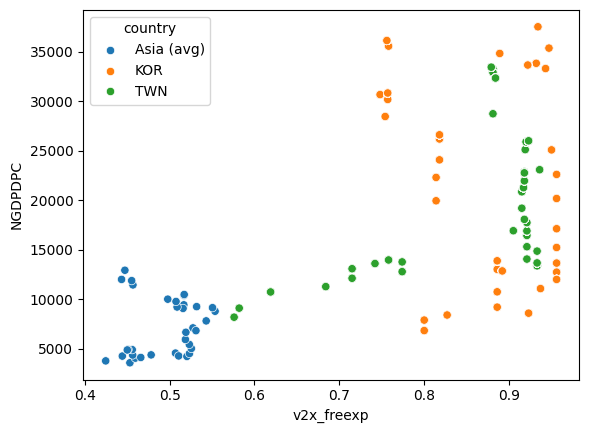

In [24]:
import seaborn as sns
sns.scatterplot(
    data = df_regression,
    y = 'NGDPDPC',
    x = 'v2x_freexp',
    hue = 'country'
)

### 1.1.2 Scatter

In [25]:
y_col = 'NGDPDPC'
x_col = 'v2x_freexp'
x = df_regression[x_col]
y = df_regression[y_col]

In [26]:
import statsmodels.api as sm
reg = sm.OLS(y, x).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                NGDPDPC   R-squared (uncentered):                   0.848
Model:                            OLS   Adj. R-squared (uncentered):              0.848
Method:                 Least Squares   F-statistic:                          2.525e+04
Date:                Mon, 26 May 2025   Prob (F-statistic):                        0.00
Time:                        07:48:26   Log-Likelihood:                         -47310.
No. Observations:                4515   AIC:                                  9.462e+04
Df Residuals:                    4514   BIC:                                  9.463e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
v2x_freexp  2.353e+04    148.063    158.899      0.000    2.32e+04    2.38e+04
==============================================================================
Omnibus:                     1140.004   Durbin-Watson:                   0.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              362.912
Skew:                           0.486   Prob(JB):                     1.57e-79
Kurtosis:                       2.008   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 1.1.3 Add log then regress

In [27]:
import numpy as np
df_regression = df[['country', 'year','NGDPDPC', 'v2x_freexp']].dropna()
df_regression['NGDPDPC_log'] = df_regression['NGDPDPC'].apply(np.log)
df_regression['v2x_freexp_scale'] = df_regression['v2x_freexp'].multiply(100)
df_regression.head(2)

,country,year,NGDPDPC,v2x_freexp,NGDPDPC_log,v2x_freexp_scale
105,Asia (avg),1990,3749.756571,0.424697,8.229446,42.469697
106,Asia (avg),1991,4234.663571,0.444273,8.351059,44.427273


<Axes: xlabel='v2x_freexp_scale', ylabel='NGDPDPC_log'>

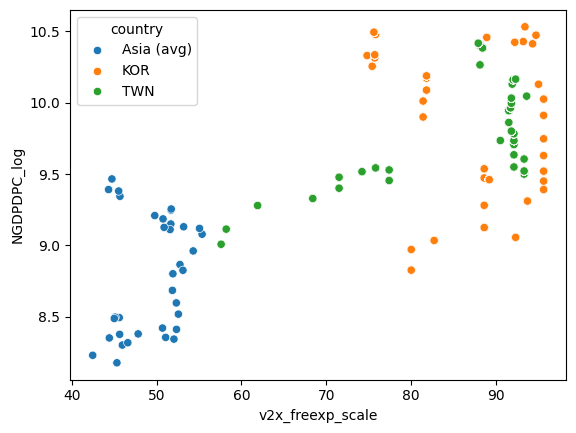

In [28]:
import seaborn as sns
sns.scatterplot(
    data = df_regression,
    y = 'NGDPDPC_log',
    x = 'v2x_freexp_scale',
    hue = 'country'
)

### 1 pt increase in feedom in expression associated with 1.3% higher GDP

In [29]:
def regression(data, y, x):
    x = data[x]
    y = data[y]
    x = sm.add_constant(x)
    reg = sm.OLS(y, x).fit()
    return reg.summary()

regression(
    data = df_regression,
    y =  'NGDPDPC_log',
    x = 'v2x_freexp'
)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            NGDPDPC_log   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.086
Method:                 Least Squares   F-statistic:                     424.4
Date:                Mon, 26 May 2025   Prob (F-statistic):           3.35e-90
Time:                        07:48:27   Log-Likelihood:                -2715.4
No. Observations:                4515   AIC:                             5435.
Df Residuals:                    4513   BIC:                             5448.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.6312      0.058    149.198      0.000       8.518       8.745
v2x_freexp     1.3788      0.067     20.601      0.000       1.248       1.510
==============================================================================
Omnibus:                      707.005   Durbin-Watson:                   0.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              162.269
Skew:                          -0.005   Prob(JB):                     5.80e-36
Kurtosis:                       2.071   Cond. No.                         17.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 1.2 Robust Standard errors

In [30]:
def regression(data, y, x):
    x = data[x]
    y = data[y]
    x = sm.add_constant(x)
    reg = sm.OLS(y, x).fit(cov_type = 'HC1') # ROBUST STANDARD ERRORS IN cov_type
    return reg.pvalues

regression(
    data = df_regression,
    y =  'NGDPDPC_log',
    x = 'v2x_freexp'
)

const         0.000000e+00
v2x_freexp    5.614891e-97
dtype: float64

## 1.3 Panel Data

### 1.3.1 Easy way

In [31]:
import statsmodels.formula.api as smf
smf.ols(formula='NGDPDPC_log ~ v2x_freexp_scale', data=df_regression).fit().params

Intercept           8.631178
v2x_freexp_scale    0.013788
dtype: float64

In [32]:
smf.ols(formula='NGDPDPC_log ~ v2x_freexp_scale + C(country)', data=df_regression).fit().params

Intercept            8.208610
C(country)[T.KOR]    0.631169
C(country)[T.TWN]    0.578734
v2x_freexp_scale     0.011719
dtype: float64

### 1.3.2 Difficult way

In [33]:
df_dummies = pd.get_dummies(df_regression['country'], drop_first = True).astype(int)
df_dummies.head(2)

,KOR,TWN
105,0,0
106,0,0


In [34]:
df_regression = pd.merge(
    df_regression,
    df_dummies,
    right_index = True,
    left_index = True
)
df_regression.head(2)

,country,year,NGDPDPC,v2x_freexp,NGDPDPC_log,v2x_freexp_scale,KOR,TWN
105,Asia (avg),1990,3749.756571,0.424697,8.229446,42.469697,0,0
106,Asia (avg),1991,4234.663571,0.444273,8.351059,44.427273,0,0


In [35]:
def regression(data, y, x_cols):
    x = data[x_cols]
    y = data[y]
    x = sm.add_constant(x)
    reg = sm.OLS(y, x).fit() # ROBUST STANDARD ERRORS IN cov_type
    return reg.params

regression(
    data = df_regression,
    y =  'NGDPDPC_log',
    x_cols = ['KOR', 'TWN', 'v2x_freexp_scale']
)

const               8.208610
KOR                 0.631169
TWN                 0.578734
v2x_freexp_scale    0.011719
dtype: float64

# 2. Machine Learning

## 2.1 Unsupervised learning: Dimension reducation/PCA

In [36]:
df_edu = pd.read_csv(f"{data_folder}/education.csv").dropna()
df_edu.head(2)

,region,subregion,country,year,PISA,GDI,GINI,LibDem,Public Spending on Education,Private Spending on Education
18,Oceania,Australia and New Zealand,Australia,2018,503.0,0.971,34.3,0.813,34.792880,34.792880
35,Europe,Western Europe,Austria,2012,490.0,0.975,30.5,0.806,95.143448,95.143448


In [37]:
data = df_edu.set_index(['country','year'])[['GINI', 'LibDem', 'Public Spending on Education', 'Private Spending on Education', 'PISA']]
data.head(2)

,,GINI,LibDem,Public Spending on Education,Private Spending on Education,PISA
country,year,,,,,
Australia,2018,34.3,0.813,34.792880,34.792880,503.0
Austria,2012,30.5,0.806,95.143448,95.143448,490.0


### 2.1.1 Set PCA

In [38]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1) 

In [39]:
principal_components = pca.fit_transform(data.drop(['PISA'], axis='columns'))
df_pca = pd.DataFrame(data=principal_components, columns=['PCA'], index = data.index)
df_pca.head(2)

,,PCA
country,year,
Australia,2018,-49.940339
Austria,2012,34.883874


In [40]:
df_pca = pd.concat([df_pca, data], axis='columns')
df_pca.head(2)

,,PCA,GINI,LibDem,Public Spending on Education,Private Spending on Education,PISA
country,year,,,,,,
Australia,2018,-49.940339,34.3,0.813,34.792880,34.792880,503.0
Austria,2012,34.883874,30.5,0.806,95.143448,95.143448,490.0


### 2.1.2 Scatter and regression

<Axes: xlabel='PCA', ylabel='PISA'>

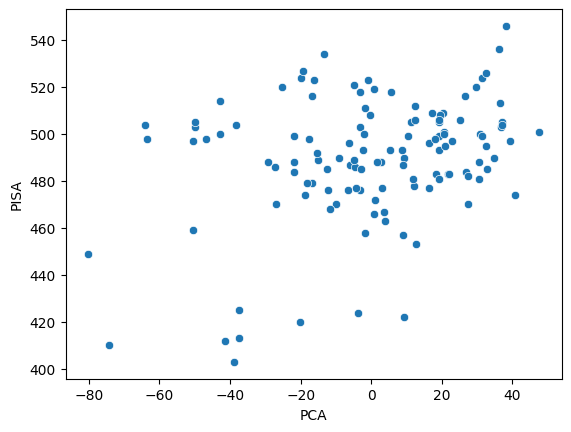

In [41]:
import seaborn as sns
sns.scatterplot(
    data = df_pca,
    y = 'PISA',
    x = 'PCA',
)

<Axes: xlabel='Public Spending on Education', ylabel='PISA'>

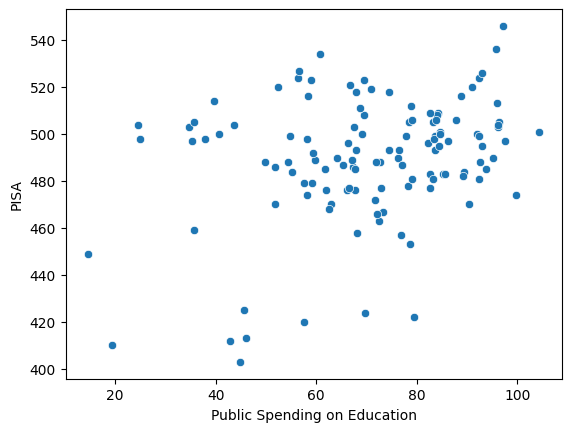

In [42]:
import seaborn as sns
sns.scatterplot(
    data = df_pca,
    y = 'PISA',
    x = 'Public Spending on Education',
)

In [43]:
def regression(data, y, x_cols):
    x = data[x_cols]
    y = data[y]
    x = sm.add_constant(x)
    reg = sm.OLS(y, x).fit() # ROBUST STANDARD ERRORS IN cov_type
    df = pd.concat([reg.params, reg.pvalues], axis=1).round(2)
    df.columns = ['coef', 'pvalue']
    return df

In [44]:

    
regression(
    data = df_pca,
    x_cols = ['PCA'],
    y = 'PISA'
)

,coef,pvalue
const,489.39,0.0
PCA,0.32,0.0


In [45]:
regression(
    data = df_pca,
    x_cols = ['LibDem'],
    y = 'PISA'
)

,coef,pvalue
const,392.09,0.0
LibDem,126.19,0.0


### 2.1.3 You shoud always scale/normalize/zscore before pca

In [46]:
data.head(2)

,,GINI,LibDem,Public Spending on Education,Private Spending on Education,PISA
country,year,,,,,
Australia,2018,34.3,0.813,34.792880,34.792880,503.0
Austria,2012,30.5,0.806,95.143448,95.143448,490.0


In [47]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.drop(['PISA'], axis='columns'))

from sklearn.decomposition import PCA
pca = PCA(n_components=1) 
principal_components = pca.fit_transform(scaled_data)

df_pca = pd.DataFrame(data=principal_components, columns=['PCA_scaled'], index = data.index)
df_pca.head(2)

,,PCA_scaled
country,year,
Australia,2018,-2.122840
Austria,2012,1.793649


In [48]:
df_pca = pd.concat([df_pca, data], axis='columns')
df_pca.head(2)

,,PCA_scaled,GINI,LibDem,Public Spending on Education,Private Spending on Education,PISA
country,year,,,,,,
Australia,2018,-2.122840,34.3,0.813,34.792880,34.792880,503.0
Austria,2012,1.793649,30.5,0.806,95.143448,95.143448,490.0


<Axes: xlabel='PCA_scaled', ylabel='PISA'>

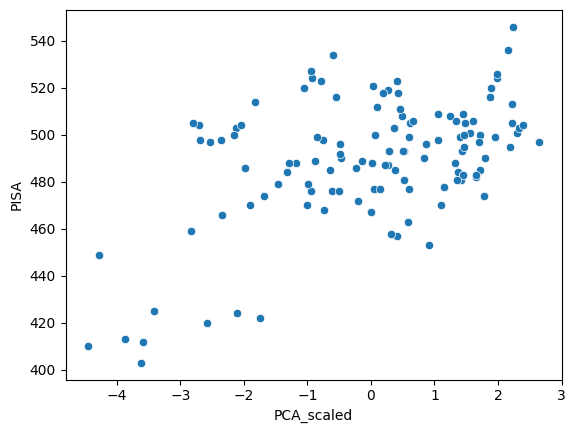

In [49]:
import seaborn as sns
sns.scatterplot(
    data = df_pca,
    y = 'PISA',
    x = 'PCA_scaled',
)

<Axes: xlabel='Public Spending on Education', ylabel='PISA'>

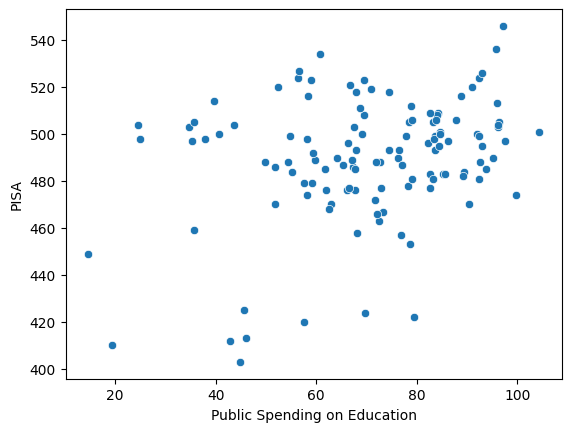

In [50]:
import seaborn as sns
sns.scatterplot(
    data = df_pca,
    y = 'PISA',
    x = 'Public Spending on Education',
)

### 2.1.4 Using PCA or other technique to create index

<Axes: xlabel='country'>

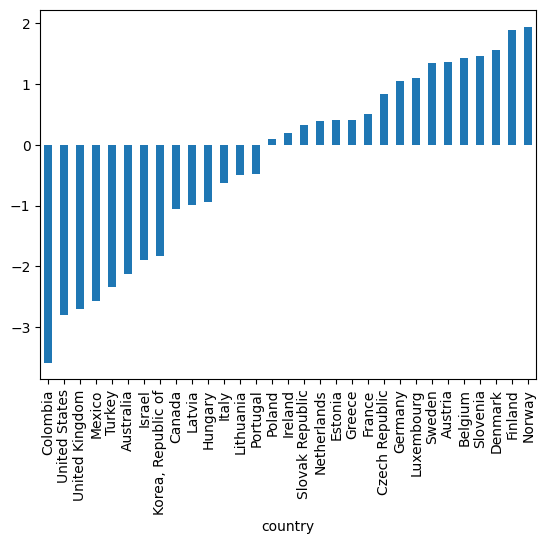

In [51]:
df_pca.query("year == 2018").sort_values('PCA_scaled').droplevel(axis=0, level= 'year')['PCA_scaled'].plot(kind ='bar')

## 2.2 Supervised

In [52]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt

In [53]:
X = df_pca.drop(['PISA', 'PCA_scaled'], axis='columns')
y = df_pca['PISA']
dtree = DecisionTreeRegressor(max_depth = 3)
dtree.fit(X, y)

DecisionTreeRegressor(max_depth=3)

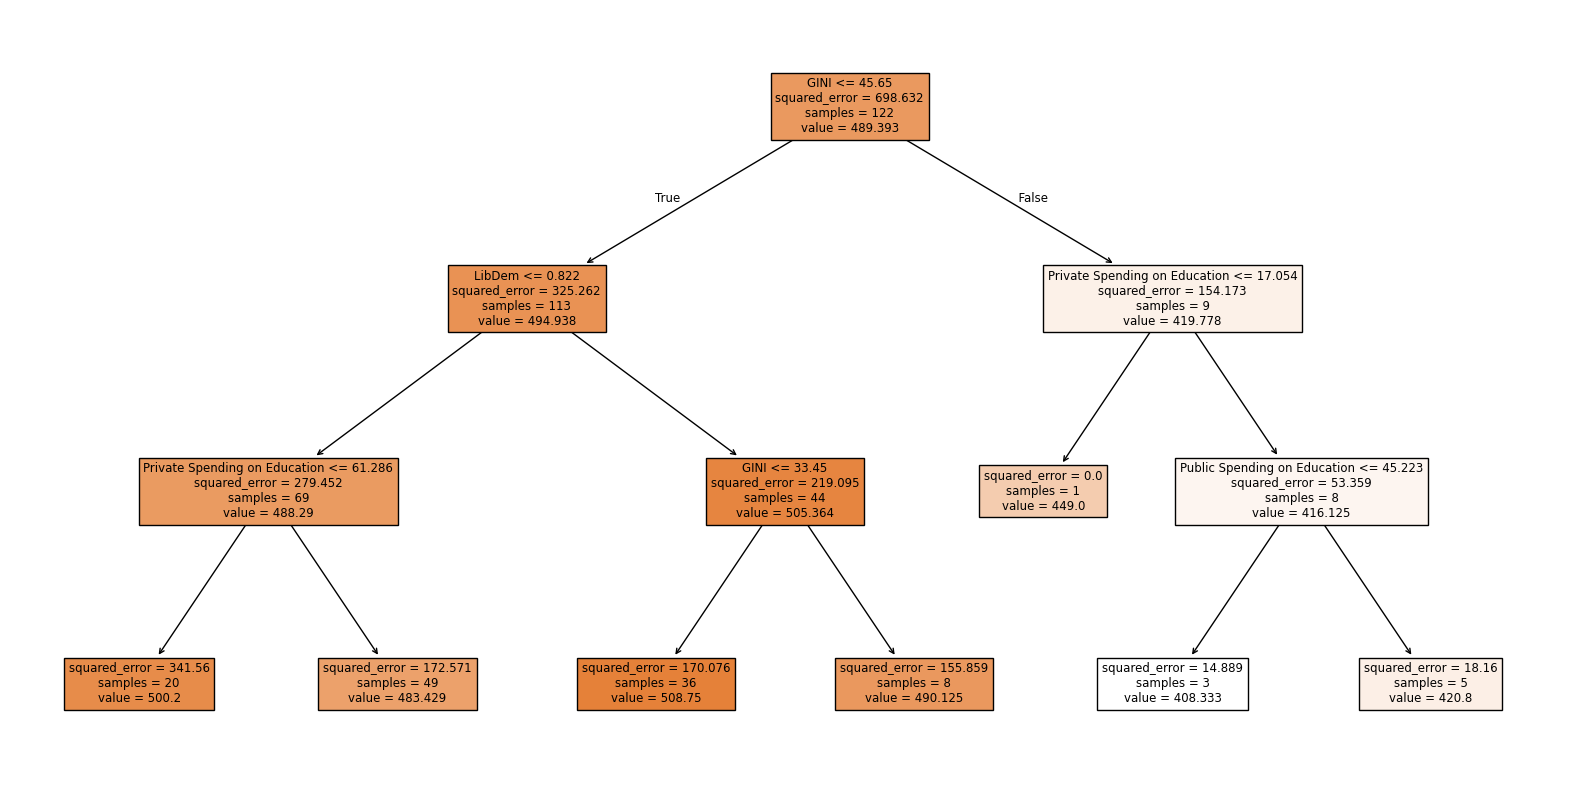

In [54]:
plt.figure(figsize=(20,10))
plot_tree(dtree, feature_names=X.columns, filled=True)
plt.show()